<a href="https://colab.research.google.com/github/natchanon6324/Tab/blob/main/Ann_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepocessing

In [8]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import random


def readfile(filepath,data):
    # read the file path and append data to list
    # open file from filepath
    file = open(filepath, 'r')
    for line in file:
        #print(line == '')
        if len(line) > 1:
            # if line not empty
            # keep data from line to list
            data.append(line.strip().split())
    # close file
    file.close()
    return data

def prepocessing(data):
    # process data to string for each in the list of data
    # create new strings for append data to new strings
    # create new list for return new strings
    list = []
    string_list = ""
    for line in data:
        string_list += ''.join(line)
        if len(string_list) % 456 == 0:
            list.append(string_list.strip())
            string_list = ""
    return list


raw_data = []
#create list for append data


filepath = 'bstrain.txt'
#input filepath

bstrain = readfile(filepath,raw_data)

data = prepocessing(bstrain)

#show example data , length data , etc.
print(f'Data from {filepath} ')
print(f'have {len(data)} instace and have {int(len(data)/20)} classes')
print(f'have {len(data[0])} characters in each strings')

Data from bstrain.txt 
have 200 instace and have 10 classes
have 456 characters in each strings


### Create function convert and random corrupted digit

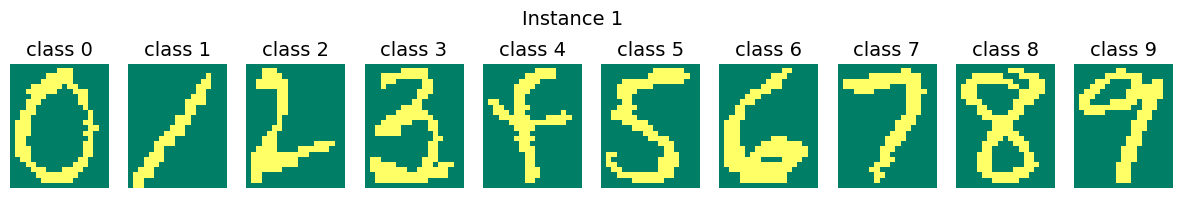

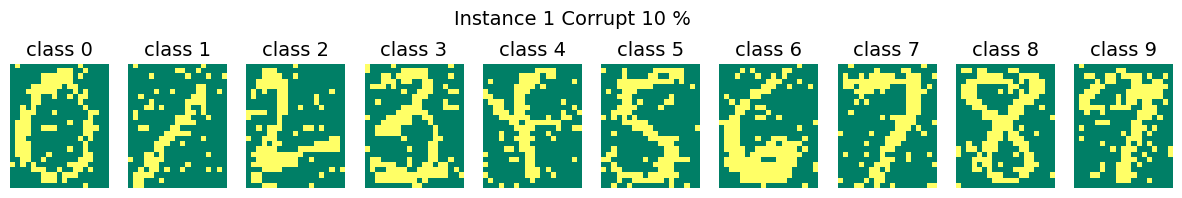

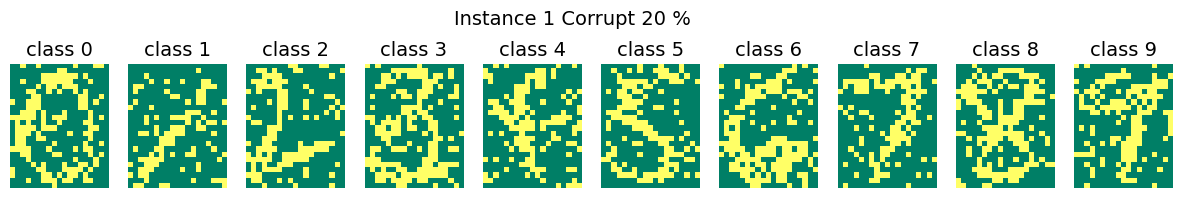

In [9]:
def array_to_matrix(data):
    #create matrix 24x19 from input of array
    #return matrix 24x19
    list = []
    for i in range(24):
        row = []
        for j in range(19):
            row.append(int(data[i*19 + j]))
        list.append(row)
    list_matrix = np.array(list).astype(int)
    return list_matrix

def flatten(data):
    #create array 1 dimensional from data
    list = []
    length = len(data)
    for i in range(length):
        list.append(int(data[i]))
    return np.array(list).astype(int)

def corrupt(data,percent):
    #create random convert data of 0,1 from percentate
    #create bit_ran for known percent of all character
    #create bit_conv to random select convert data of 0,1
    bit_ran = int(len(data) * percent)
    bit_conv = random.choices(range(len(data)) , k=bit_ran)
    data = list(data)
    for i in bit_conv:
        if data[i] == '0':
            data[i] = '1'
        else:
            data[i] = '0'
    data = ''.join(data)
    return data

def plot_examples(data,percent,number):
    #Create figure and choose one example for each classes
    #to plot Examples data or Corrupted data from percentate
    h = 0
    fig = plt.figure(figsize=(15,10))
    for i in range (1):
        for j in range(10):
            if percent > 0:
                if h == 0:
                    plt.suptitle(f'Instance {number + 1} Corrupt {int(percent * 100)} %', fontsize=14)
                    plt.subplots_adjust(top = 0.935)
                    h += 1
                plt.subplot(5,10,(j+(i*10)+1))
                plt.imshow(array_to_matrix(corrupt(data[(j*20)+ number],percent)), cmap='summer')
                plt.axis('off')
                plt.title(f'class {j}' , fontsize=14)
            elif percent == 0:
                if h == 0:
                    plt.suptitle(f'Instance {number + 1}', fontsize=14)
                    plt.subplots_adjust(top = 0.935)
                    h += 1
                plt.subplot(5,10,(j+(i*10)+1))
                plt.imshow(array_to_matrix(data[(j*20) + number]), cmap='summer')
                plt.axis('off')
                plt.title(f'class {j}', fontsize=14)

plot_examples(data,0,0)
plot_examples(data,0.1,0)
plot_examples(data,0.2,0)
#plat 1st instance for Example
#plot 1st instance for 10% and 20% corrupted data


## Associative Memory

In [10]:
train_data = data[::20]
test_data = data[::20] + data[1::20] + data[2::20]
#data point index 0, 20, 40, ...., 180 for Train_data
#data point index 0, 20, 40, ...., 180 and 1, 21, 41, ...., 181 and 5, 25, 45, ...., 185 for Test_data
#print(f'{len(train_data)}')
#print(f'{test_data}')

In [11]:
class associativememory:
    #create class associative memory
    def __init__(self, data, learning_rate):
        self.data = data
        self.instance = len(data)
        self.length = len(data[0])
        self.weights = np.zeros((self.length,self.length))
        self.learning_rate = learning_rate
        # instance is number of classes this case is 10 instance
        # set weight metrix zero and weight size = length of data for each index or 456x456

    def outer_product(self,epochs):
        # Trainging associative memory with Outer Product
        # Update weights with Outer Product

        print('Training Outer Product \n')
        loss = []

        for j in range(epochs):
            conv = random.choices(range(self.instance), k=self.instance)
            # random choose a index data
            error_sum = 0
            # sum of error
            update = np.zeros((self.length, self.length))
            # update paras

            for i in conv:
                # Convert data

                x = [int(bit) for bit in self.data[i]]
                dM = np.outer(x, x)
                # Outer Product x,x
                # Outer Memory

                error = np.mean((x - np.dot(dM, x)) ** 2)
                # Mean Squared Error (MSE)

                error_sum += error
                update += dM
                #update Memory

            self.weights += update
            #update weights

            loss.append([j+1, error_sum])
            #Update Loss Validation

            if j % 10 == 0:
                print(f'Epoch {j+1}, Error {error_sum}')
            elif error_sum < 1e-5 or np.isnan(error_sum):
                print(f'Epoch {j+1}, Error {error_sum}')
                print('End condition. Stop training ...')
                break
            # Check Condition for stop training

        print(f'Done \nError {error_sum}')
        return loss

    def delta_rule(self, epochs):
        # Training associative memory with Delta Rule
        # update the weights with Delta Rule

        print('Training Delta Rule \n')
        loss = []

        for j in range(epochs):
            conv = random.choices(range(self.instance), k=self.instance)
            # random choose a index data
            error_sum = 0
            # sum of error
            update = np.zeros((self.length, self.length))
            # update paras

            for i in conv:
                #Convert data
                x = flatten(self.data[i])
                #flatten to 1-dimansional
                error = x - np.dot(self.weights, x)
                error_sum += mse(x, np.dot(self.weights, x))
                update = self.learning_rate*np.outer(error.reshape(-1, 1), x.reshape(-1, 1))

            self.weights += update
            # update weights
            loss.append([j+1, error_sum])
            #Update Loss Validation

            if j % int(epochs/10) == 0 or j == epochs-1:
                print(f'Epoch {j+1}, Error {error_sum}')
            if error_sum < 1e-5 or error_sum == np.Inf:
                print(f'Epoch {j+1}, Error {error_sum}')
                print('End condition. Stop training...')
                break
            # Check Condition for stop training

        print(f'Done \nEpoch {j+1}, Error {error_sum}')
        return loss

    def recall(self, data):
        # function multiply data with weights

        data = flatten(data)
        result = np.dot(self.weights, data)
        # dot data with weight

        result = (result - result.min())/(result.max() - result.min())
        # normalize

        result[result < 0.5] = 0
        result[result >= 0.5] = 1
        # threshold
        return result

    def loss_avg_o(self, loss):
        # function plot Training Result of Outer Product
        loss = np.array(loss)
        fig = plt.figure(figsize=(12,6))
        plt.plot(loss[:,0], loss[:,1], alpha=0.8, label='Error')
        window = 4
        running_average = np.convolve(loss[:,1], np.ones(window)/window, mode='valid')
        plt.plot(loss[window-1:,0], running_average, alpha=1, label='Running average')
        plt.xlabel('Epochs')
        plt.ylabel('Error')
        plt.title('Training with Outer Product')
        plt.grid()
        plt.legend()

    def loss_avg_d(self, loss):
        # function plot Training Result of Delta Rule
        loss = np.array(loss)
        fig = plt.figure(figsize=(12,6))
        plt.plot(loss[:,0], loss[:,1], alpha=0.8, label='Error')
        window = 7
        running_average = np.convolve(loss[:,1], np.ones(window)/window, mode='valid')
        plt.plot(loss[window-1:,0], running_average, alpha=1, label='Running average')
        plt.xlabel('Epochs')
        plt.ylabel('Error')
        plt.yscale('log')
        plt.title('Training with Delta Rule')
        plt.grid()
        plt.legend()


### Outer Product

Training Outer Product 

Epoch 1, Error 39743.93859649122
Epoch 11, Error 31385.62719298245
Epoch 21, Error 37946.01315789474
Epoch 31, Error 28408.245614035088
Epoch 41, Error 30347.85526315789
Epoch 51, Error 32868.4649122807
Epoch 61, Error 31262.087719298244
Epoch 71, Error 32738.140350877195
Epoch 81, Error 31308.11403508772
Epoch 91, Error 36772.98245614035
Done 
Error 22328.083333333336


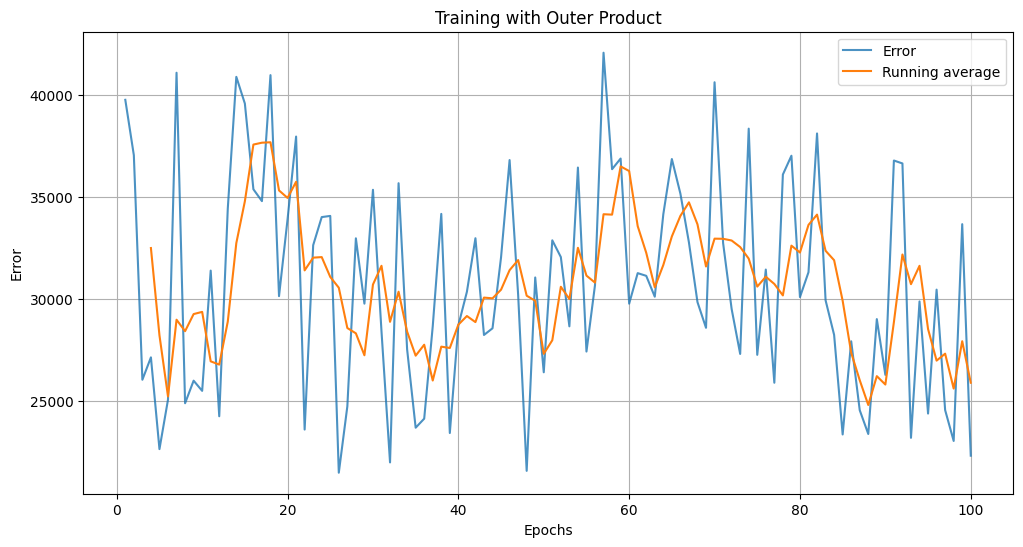

In [12]:
am_outer = associativememory(train_data,0.05)
history = am_outer.outer_product(100)
am_outer.loss_avg_o(history)
#training with outer product epochs = 100 , learning rate = 5%

In [13]:
def plot_outer(test_data,percent,count):
    #plot outer product input, output, Diferrent I/O
    mse_list = []
    std = []
    h = 0
    count = count
    fig = plt.figure(figsize=(12,15))
    for i in range (3):
        if percent > 0:
            #Case have corrupted
            for j in range(10):
                index = 30 * i + j
                x = corrupt(test_data[count],percent)
                x_mtx = array_to_matrix(x)
                y = am_outer.recall(x).reshape(24, 19)
                error = x_mtx - y

                plt.subplot(9,10,index + 1)
                plt.imshow(x_mtx, cmap='summer')
                plt.axis('off')
                if index % 10 == 0:
                    plt.title(f'Input', fontsize=14)
                plt.subplot(9, 10,index + 11)
                plt.imshow(y, cmap='summer')
                plt.axis('off')
                if index % 10 == 0:
                    plt.title(f'Output ', fontsize=14)
                plt.subplot(9, 10, index + 21)
                plt.imshow(np.abs(error), cmap='summer')
                plt.axis('off')
                if index % 10 == 0:
                    plt.title(f'Different', fontsize=14)

                count += 1
                mse_list.append(mse(x_mtx, y).mean())
                std.append(np.std(error))

        elif percent == 0:
            #Case No corrupted
            for j in range(10):
                index = 30 * i + j
                x = test_data[count]
                x_mtx = array_to_matrix(x)
                y = am_outer.recall(x).reshape(24, 19)
                error = x_mtx - y

                plt.subplot(9,10,index +1)
                plt.imshow(x_mtx, cmap='summer')
                plt.axis('off')
                if index % 10 == 0:
                    plt.title(f'Input', fontsize=14)
                plt.subplot(9, 10,index + 11)
                plt.imshow(y, cmap='summer')
                plt.axis('off')
                if index % 10 == 0:
                    plt.title(f'Output', fontsize=14)
                plt.subplot(9, 10, index + 21)
                plt.imshow(np.abs(error), cmap='summer')
                plt.axis('off')
                if index % 10 == 0:
                    plt.title(f'Different', fontsize=14)

                count += 1
                mse_list.append(mse(x_mtx, y).mean())
                std.append(np.std(error))
    if h == 0:
        mse_list = np.array(mse_list)
        std = np.array(std)
        if percent > 0:
            plt.suptitle(f'Test data of Outer Product with Corrupted {int(percent * 100)} % (MSE : {mse_list.mean():.2f}, STD : {std.mean():.2f})', fontsize= 16)
        elif percent == 0:
            plt.suptitle(f'Test data of Outer Product (MSE : {mse_list.mean():.2f}, STD : {std.mean():.2f})', fontsize= 16)
        plt.subplots_adjust(top = 0.935)
        h += 1


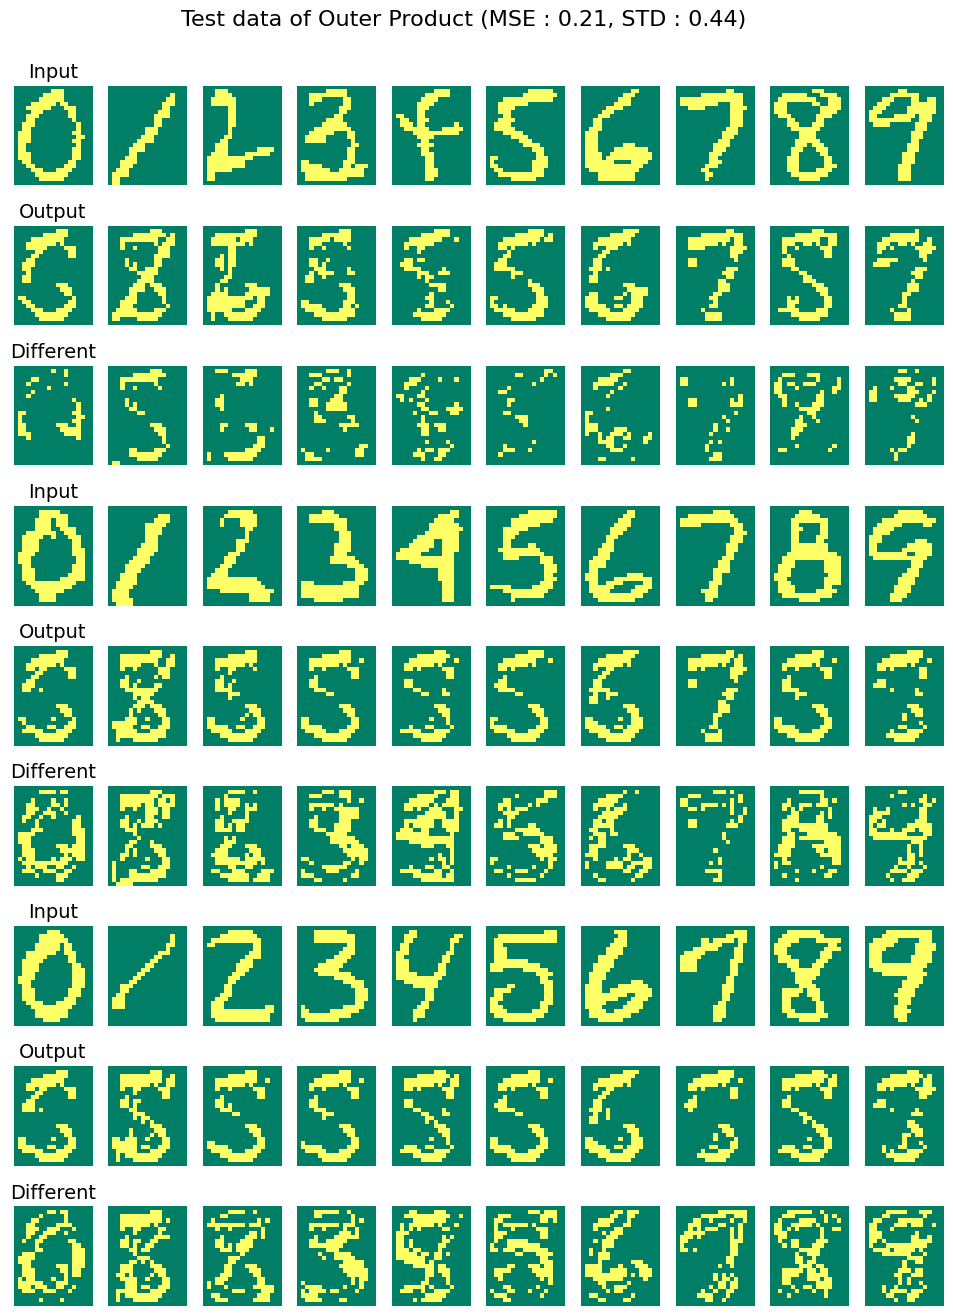

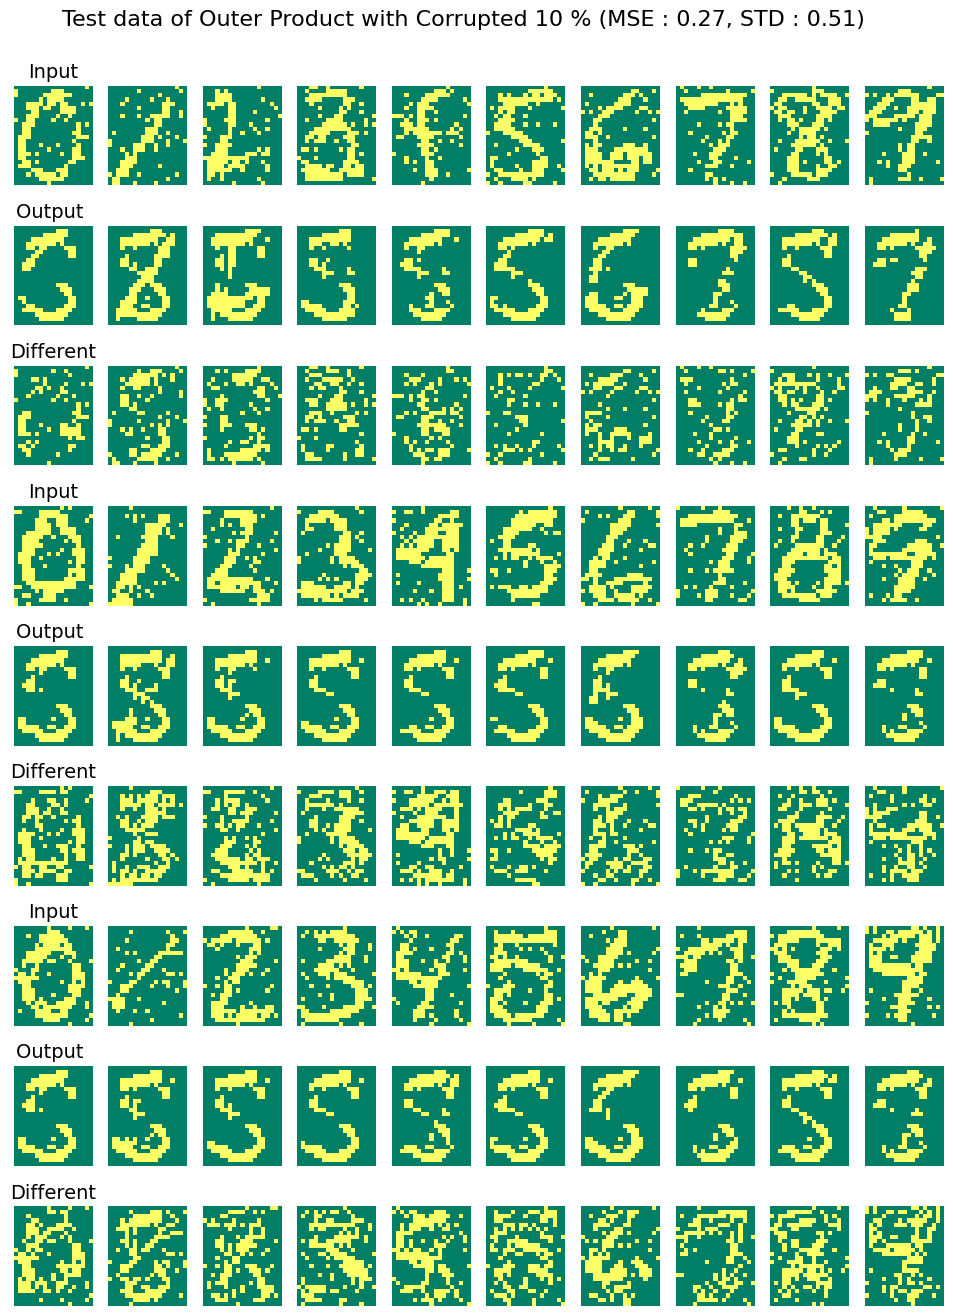

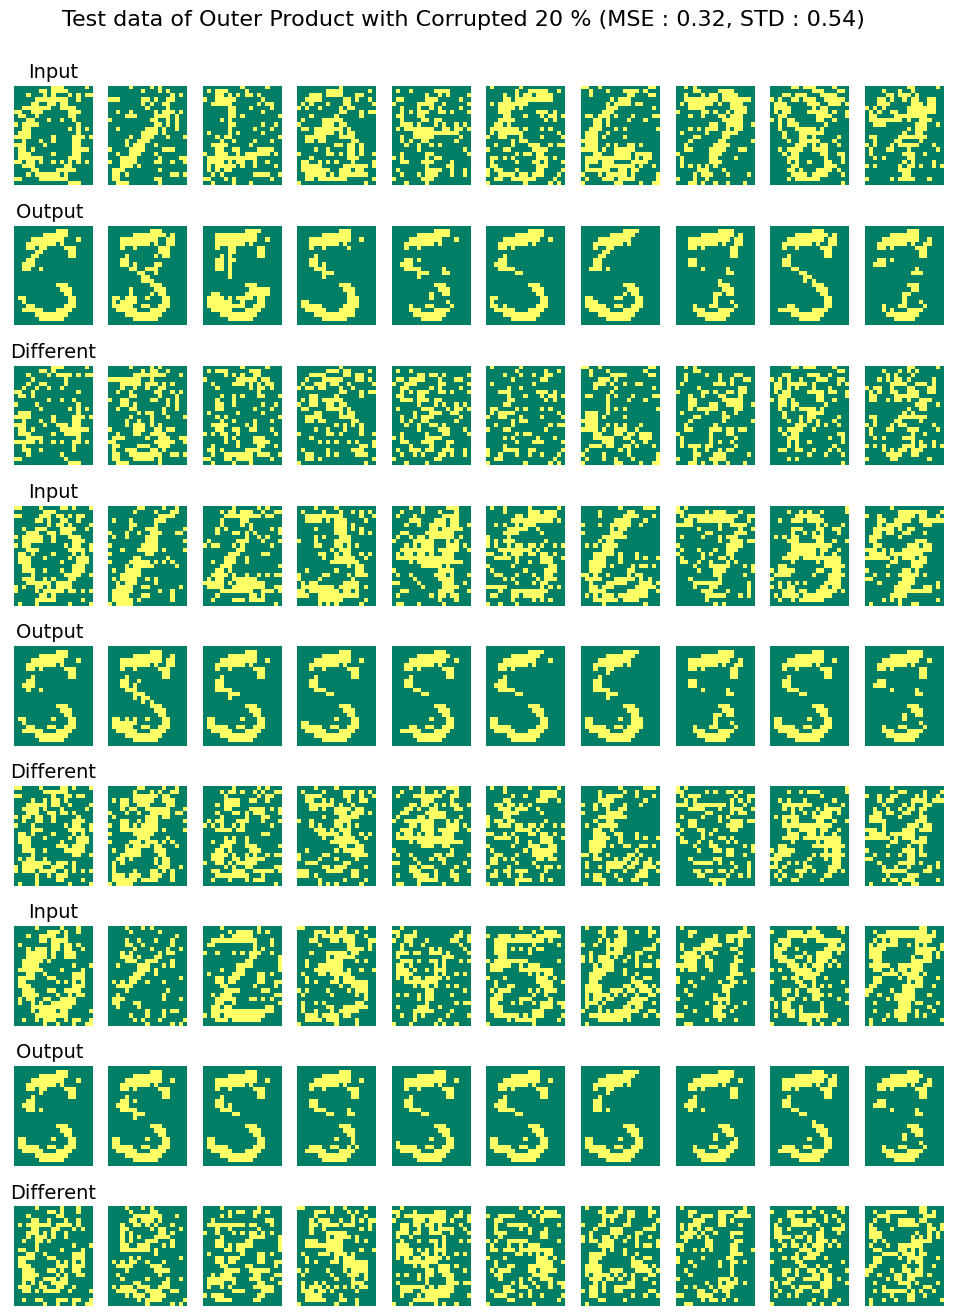

In [14]:
plot_outer(test_data,0,0)
plot_outer(test_data,0.1,0)
plot_outer(test_data,0.2,0)
# show test data the first , second and sixth digit, corrupted 10%, 20% of outer product

### Delta Rule

Training Outer Product 

Epoch 1, Error 38275.40789473684
Done 
Error 38275.40789473684
Training Delta Rule 

Epoch 1, Error 337330.8728070175
Epoch 201, Error 0.0010393506566572686
Epoch 268, Error 8.687736399313422e-06
End condition. Stop training...
Done 
Epoch 268, Error 8.687736399313422e-06


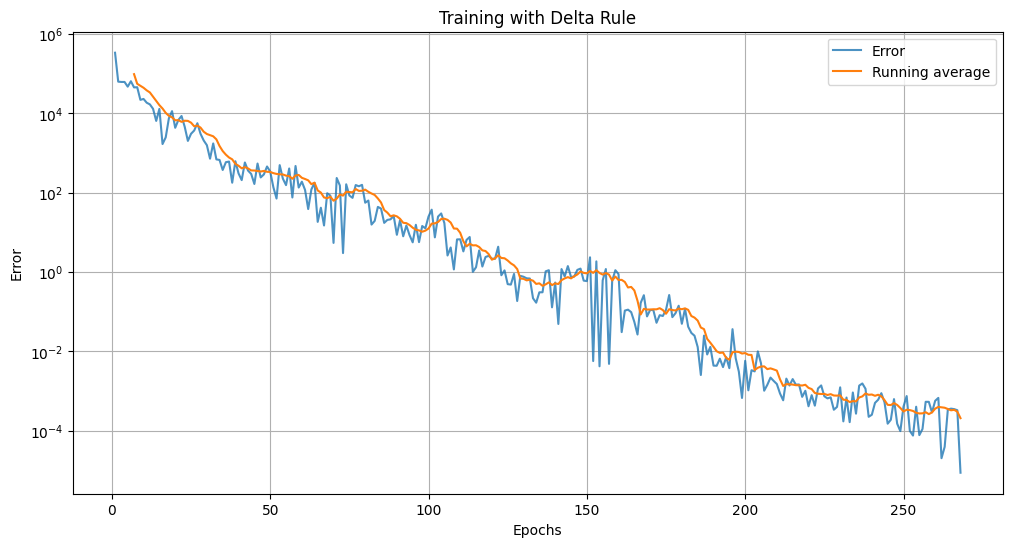

In [15]:
am_delta = associativememory(train_data, learning_rate=1e-2)
am_delta.outer_product(1)
history2 = am_delta.delta_rule(2000)
am_delta.loss_avg_d(history2)
#training with delta rule epochs = 2000 , learning rate = 1x10^-2

In [16]:
def plot_delta(test_data,percent,count):
    #plot delta rule input, output, Diferrent I/O
    mse_list = []
    std = []
    h = 0
    fig = plt.figure(figsize=(12,15))
    for i in range (3):
        if percent > 0:
            #Case have corrupted
            for j in range(10):
                index = 30 * i + j
                x = corrupt(test_data[count],percent)
                x_mtx = array_to_matrix(x)
                y = am_delta.recall(x).reshape(24, 19)
                error = x_mtx - y

                plt.subplot(9,10,(index+1))
                plt.imshow(x_mtx, cmap='summer')
                plt.axis('off')
                if index % 10 == 0:
                    plt.title(f'Input', fontsize=14)
                plt.subplot(9, 10,(index+11))
                plt.imshow(y, cmap='summer')
                plt.axis('off')
                if index % 10 == 0:
                    plt.title(f'Output', fontsize=14)
                plt.subplot(9, 10, (index+21))
                plt.imshow(np.abs(error), cmap='summer')
                plt.axis('off')
                if index % 10 == 0:
                    plt.title(f'Different', fontsize=14)

                count += 1
                mse_list.append(mse(x_mtx, y).mean())
                std.append(np.std(error))

        elif percent == 0:
            #Case no corrupted
            for j in range(10):
                index = 30 * i + j
                x = test_data[count]
                x_mtx = array_to_matrix(x)
                y = am_delta.recall(x).reshape(24, 19)
                error = x_mtx - y

                plt.subplot(9,10,(index+1))
                plt.imshow(x_mtx, cmap='summer')
                plt.axis('off')
                if index % 10 == 0:
                    plt.title(f'Input', fontsize=14)
                plt.subplot(9, 10,(index+11))
                plt.imshow(y, cmap='summer')
                plt.axis('off')
                if index % 10 == 0:
                    plt.title(f'Output', fontsize=14)
                plt.subplot(9, 10, (index+21))
                plt.imshow(np.abs(error), cmap='summer')
                plt.axis('off')
                if index % 10 == 0:
                    plt.title(f'Different', fontsize=14)

                count += 1
                mse_list.append(mse(x_mtx, y).mean())
                std.append(np.std(error))
    if h == 0:
        mse_list = np.array(mse_list)
        std = np.array(std)
        if percent > 0:
            plt.suptitle(f'Test data of Delta Rule with Corrupted {int(percent * 100)} % (MSE : {mse_list.mean():.2f}, STD : {std.mean():.2f})', fontsize= 16)
        elif percent == 0:
            plt.suptitle(f'Test data of Delta Rule (MSE : {mse_list.mean():.2f}, STD : {std.mean():.2f})', fontsize= 16)
        plt.subplots_adjust(top = 0.935)
        h += 1

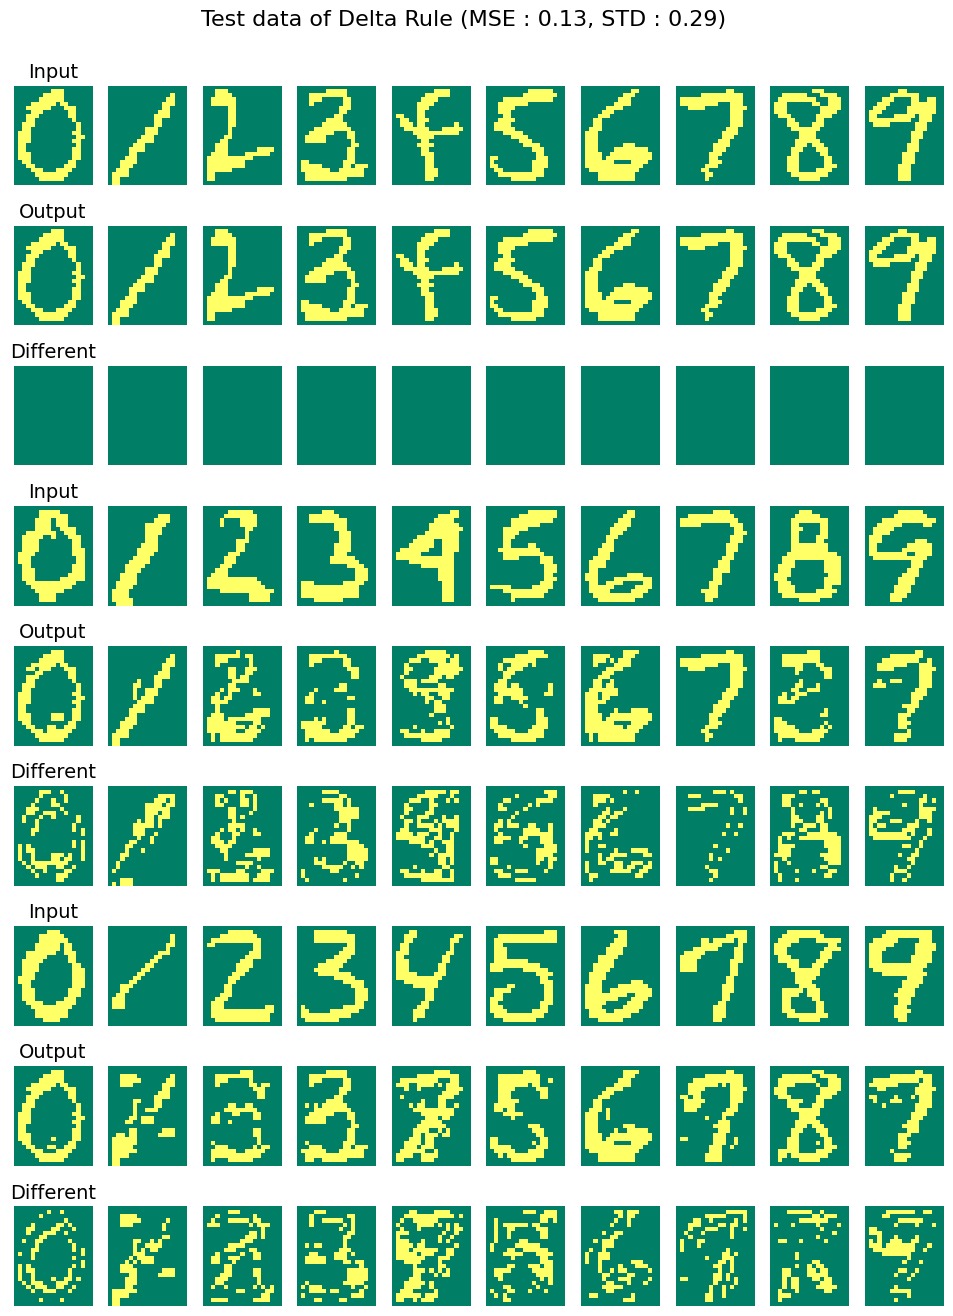

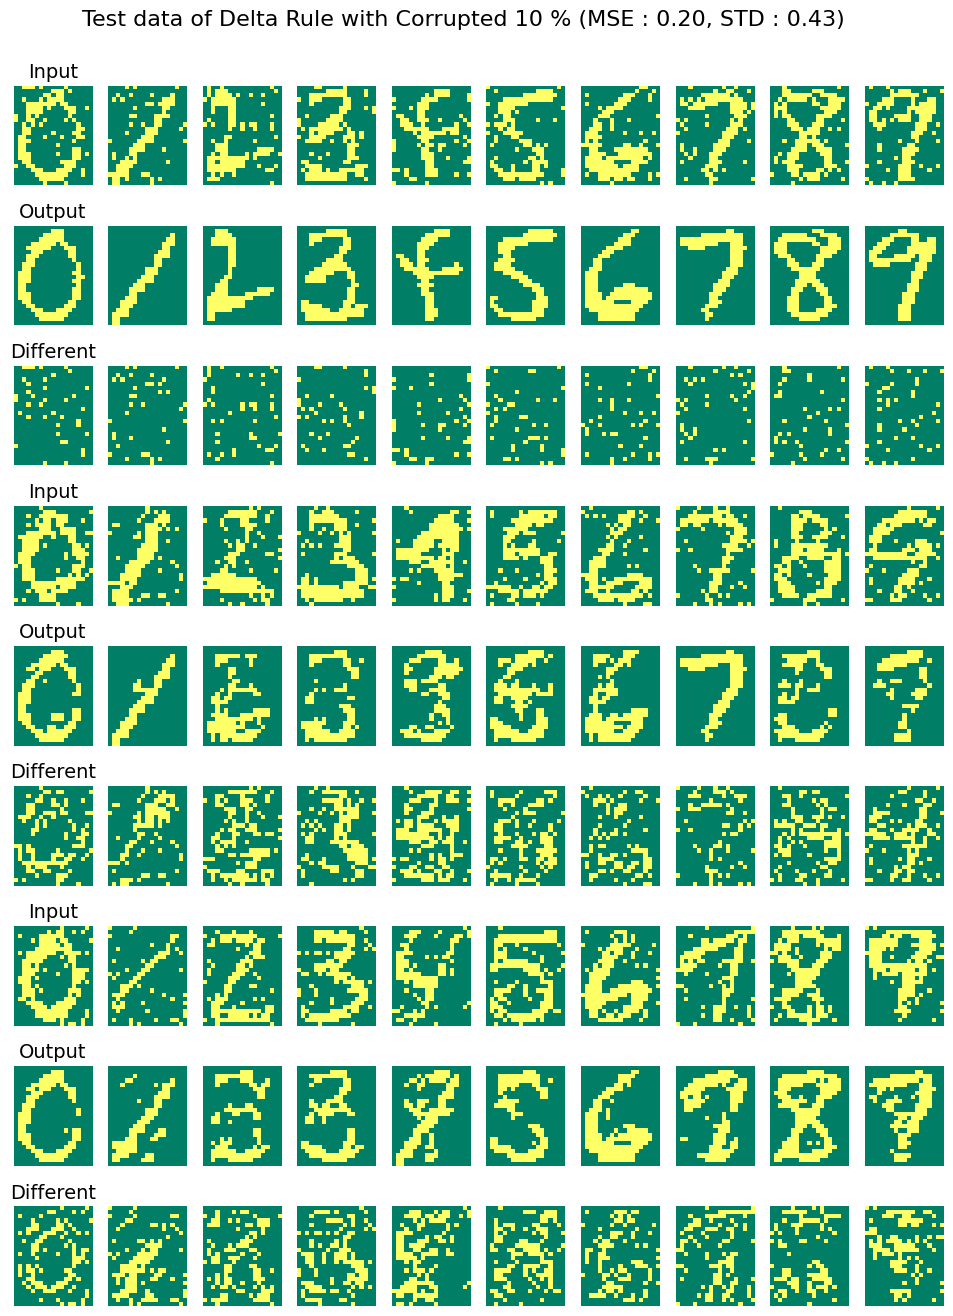

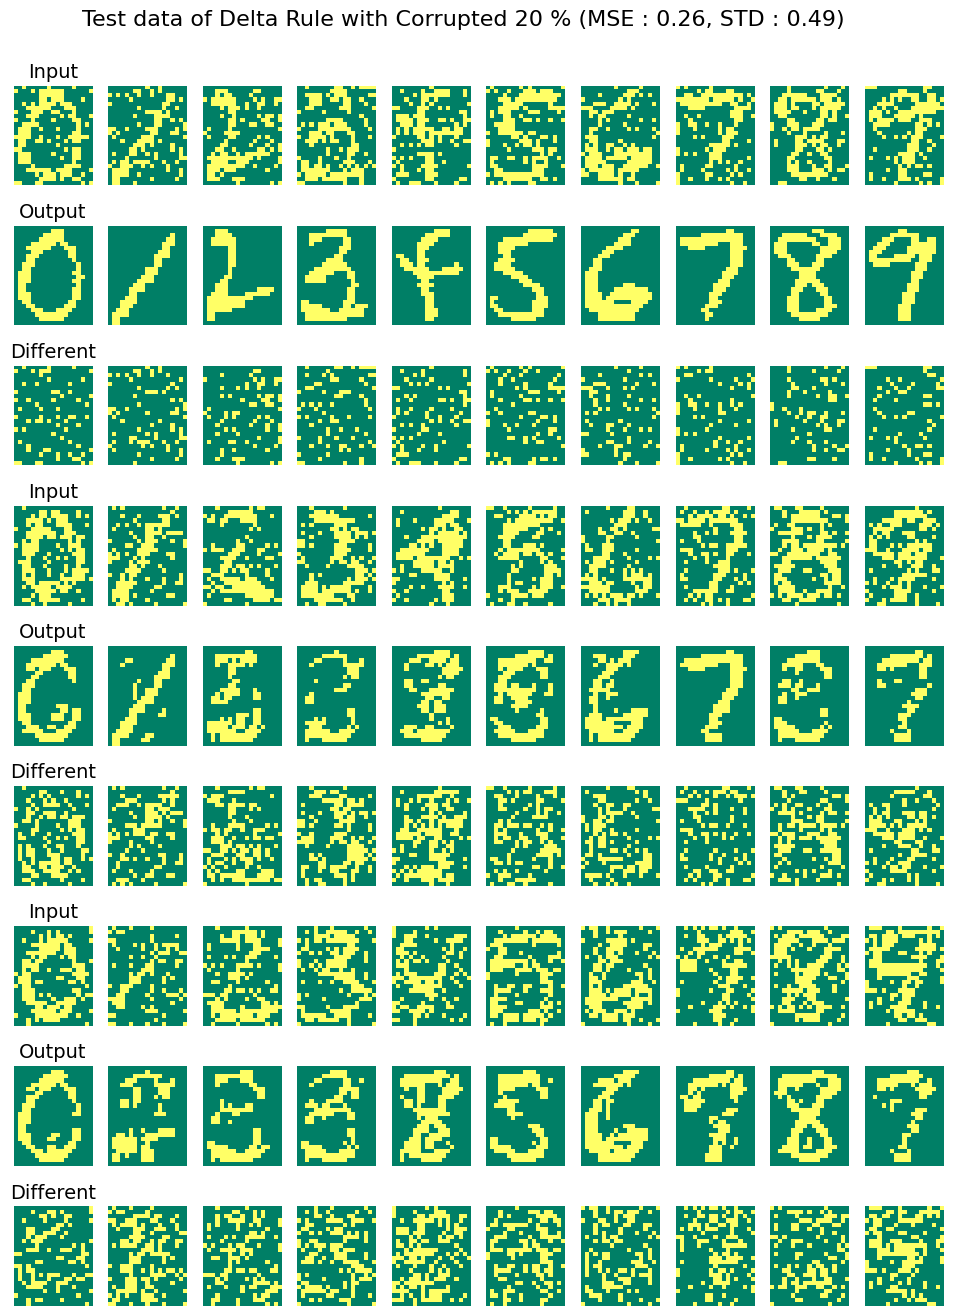

In [17]:
plot_delta(test_data,0,0)
plot_delta(test_data,0.1,0)
plot_delta(test_data,0.2,0)
# show test data the first , second and sixth digit, corrupted 10%, 20% of delta rule